<h1 style="text-align:center;">Classifier non-ANN - SVM</h1>
<p style="font-size:1.5em;">Disusun oleh Kelompok Dendeng</p>
<ol>
    <li style="font-size:1.25em;">Alfian Badrul Isnan (1806148643)</li>
    <li style="font-size:1.25em;">Farid Muhammad Rahman (1806148662)</li>
    <li style="color:green;font-size:1.25em;">Sherly (1806148832)</li>
    <li style="font-size:1.25em;">Alvin Audinata (1806200204)</li>
</ol>

# Import library yang akan digunakan

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.preprocessing import scale

In [2]:
# dataset
train=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'train').iloc[:,1:]
test=pd.read_excel(r"..\dataset\dataset.xlsx", sheet_name = 'test').iloc[:,1:]

In [3]:
def caption(df, txt):
    return df.style.set_caption(txt).set_table_styles([dict(selector="caption",
                                                            props=[("text-align", "center"),
                                                                   ("font-size", "150%"),
                                                                   ("font-weight", "bold"),
                                                                   ("color", 'black')])])

In [5]:
def classifier(X_train, y_train, X_test, kernel, gridsearch, c, gamma):
    folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
    hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
    non_linear_model = SVC(kernel=kernel, C=c, gamma = gamma) if(gridsearch) else SVC(kernel=kernel) 
    if(gridsearch):
        model_cv = GridSearchCV(estimator = non_linear_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)
        model_cv.fit(X_train, y_train)
        y_pred = model_cv.predict(X_test)
        return y_pred, model_cv
    else:    
        non_linear_model.fit(X_train, y_train)
        y_pred = non_linear_model.predict(X_test)         
        return y_pred

In [6]:
def truthTable(test, pred):
    df = pd.DataFrame (columns = ['Prediction','Expected', 'Correct?'])
    for y in range(len(test)):
        testval = test.values[y]
        df = df.append(pd.DataFrame ([[testval,pred[y],'Correct' if testval == pred[y] else 'Incorrect']],
            columns = ['Prediction','Expected', 'Correct?']), ignore_index=True)
    return df

In [7]:
def pred_table(res):
    total_rows = len(res)
    columns = ["Class", "Correct", "Total", "Recognition rate (%)"]
    pred_table = pd.DataFrame(columns=columns)
    for alphabet in list(string.ascii_uppercase):
        class_correct = res[(res["Expected"] == alphabet) & (res["Correct?"] == "Correct")]
        class_row_correct = len(class_correct)
        class_total = res[(res["Expected"] == alphabet)]
        class_row_total = len(class_total)
        class_correct_percent = round(class_row_correct * 100 / class_row_total, 2)
        entry = pd.DataFrame([[alphabet, class_row_correct, class_row_total, class_correct_percent]], columns=columns)
        pred_table = pred_table.append(entry)
    return pred_table.reset_index(drop=True)

In [19]:
def generatePred(xtrain, ytrain, xtest, ytest, param, gridsearch, c, gamma):
    pred = classifier(xtrain, ytrain, xtest, param, gridsearch, c, gamma)
    res = truthTable(ytest, pred)
    display(caption(res.head(), "Prediction result"))
    export = pred_table(res)
    display(caption(export, "Recognition rate for every class"))
    return export

# Dataset yang akan digunakan

In [9]:
df_train_disp = caption(train.head(), "Training dataset (snapshot)")
df_test_disp = caption(test.head(), "Testing dataset (snapshot)")
display(df_train_disp, df_test_disp)

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,T,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,T,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,T,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,T,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,T,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,T,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,T,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,T,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


In [10]:
order = list(np.sort(train['letter'].unique()))
print(order)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


berikut wujud dari letter xbox

<AxesSubplot:xlabel='letter', ylabel='x-box'>

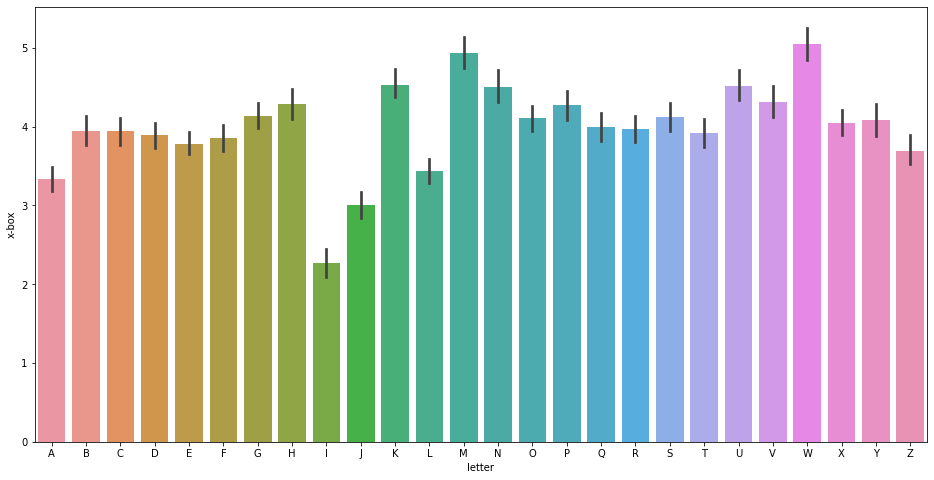

In [11]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='x-box', 
            data=train, 
            order=order)

<AxesSubplot:xlabel='letter', ylabel='x-box'>

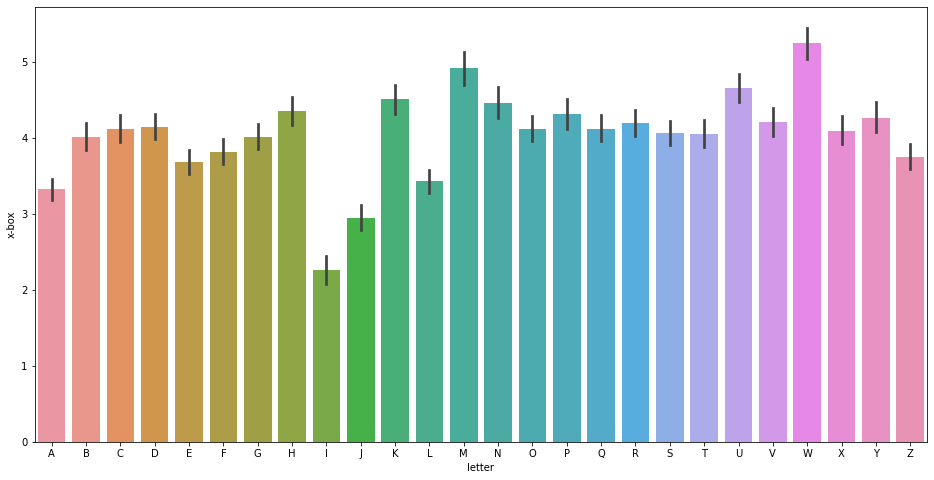

In [12]:
plt.figure(figsize=(16, 8))
sns.barplot(x='letter', y='x-box', 
            data=test, 
            order=order)

# Dibawah ini dataset yang akan digunakan

In [13]:
letter_means = train.groupby('letter').mean()
letter_means.head()

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
letter,,,,,,,,,,,,,,,,
A,3.341523,6.977887,5.100737,5.154791,3.004914,8.820639,3.611794,2.710074,2.046683,7.776413,2.336609,8.449631,2.783784,6.294840,2.845209,7.442260
B,3.948403,6.815725,5.004914,5.140049,4.511057,7.589681,7.046683,5.530713,5.621622,7.828010,5.555283,6.628993,3.039312,7.931204,6.619165,9.149877
C,3.941032,6.891892,4.592138,5.140049,2.683047,5.432432,7.628993,5.869779,7.142506,8.842752,7.535627,11.950860,1.923833,8.894349,3.995086,8.547912
D,3.894349,7.098280,5.076167,5.218673,3.975430,7.474201,6.899263,6.039312,6.525799,8.108108,5.194103,5.636364,3.302211,7.832924,3.948403,7.567568
E,3.786241,6.950860,4.796069,5.245700,3.663391,5.923833,7.331695,4.189189,7.643735,8.631450,6.257985,10.309582,2.090909,8.270270,6.009828,8.511057


# Visualisasi Data

<AxesSubplot:ylabel='letter'>

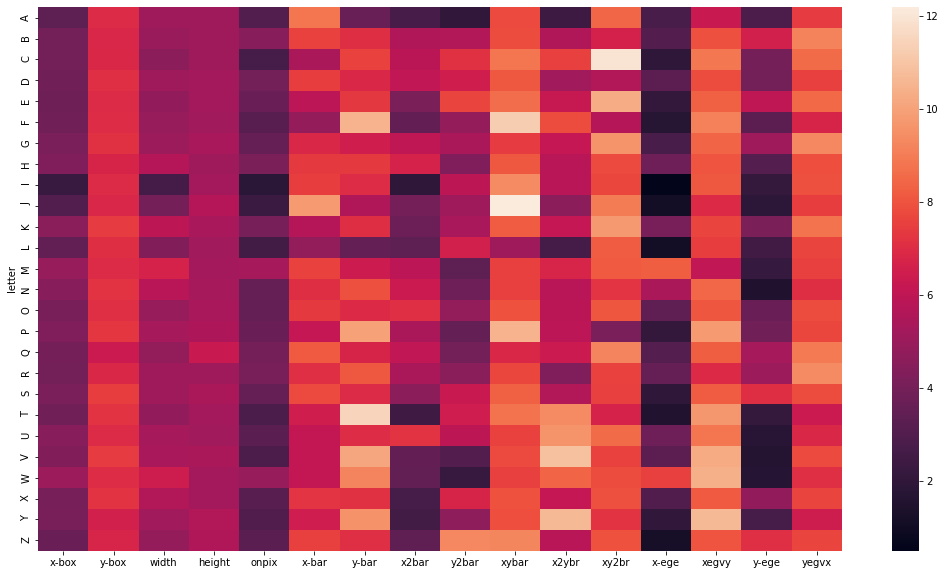

In [14]:

plt.figure(figsize=(18, 10))
sns.heatmap(letter_means)

##  Persiapan Data

# Melakukan Features Scaling dan Train set Pada Variabel

In [15]:
X_train_unscaled = train.drop(["letter"], axis=1)
y_train = train["letter"]
X_test_unscaled = test.drop(["letter"], axis=1)
y_test = test["letter"]

display(
    caption(X_train_unscaled.head(), "Features for training (snapshot)"),
    caption(y_train.to_frame().head(), "Resulting letter for training (snapshot)"),
    caption(X_test_unscaled.head(), "Features for testing (snapshot)"),
    caption(y_test.to_frame().head(), "(Expected) prediction letter from testing (snapshot)")
)

,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,3,6,4,4,2,6,12,2,7,11,9,4,1,11,2,5
1,6,8,6,6,3,4,12,3,8,12,10,4,1,10,2,5
2,2,1,3,2,1,6,12,3,6,8,11,7,2,11,1,7
3,10,14,8,8,4,7,8,3,10,13,6,6,2,9,5,5
4,5,10,7,7,8,6,8,4,6,7,6,9,5,8,5,6


,letter
0,T
1,T
2,T
3,T
4,T


,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,7,9,8,8,8,6,8,3,9,8,7,9,3,8,8,6
1,3,3,4,2,2,6,11,3,7,11,9,5,1,11,3,4
2,3,8,5,6,4,6,11,2,7,8,11,8,2,12,1,7
3,4,8,5,6,4,6,11,3,7,8,11,8,2,12,1,7
4,5,10,7,8,6,6,7,7,7,8,9,8,4,9,7,7


,letter
0,T
1,T
2,T
3,T
4,T


In [16]:
# scaling the features
X_train = scale(X_train_unscaled)
X_test = scale(X_test_unscaled)

## Model Building

In [20]:
export1A = generatePred(X_train, y_train, X_test, y_test, 'linear', False, None, None)

,Prediction,Expected,Correct?
0,T,Z,Incorrect
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,381,421,90.500000
1,B,362,460,78.700000
2,C,346,404,85.640000
3,D,353,433,81.520000
4,E,341,429,79.490000
5,F,360,441,81.630000
6,G,316,434,72.810000
7,H,274,391,70.080000
8,I,353,390,90.510000
9,J,359,418,85.890000


# Akurasi model non-linear sekitar 85%

In [24]:
export2B = generatePred(X_train, y_train, X_test, y_test, 'rbf', False, None, None)

,Prediction,Expected,Correct?
0,T,T,Correct
1,T,T,Correct
2,T,T,Correct
3,T,T,Correct
4,T,T,Correct


,Class,Correct,Total,Recognition rate (%)
0,A,398,406,98.030000
1,B,387,471,82.170000
2,C,365,372,98.120000
3,D,377,425,88.710000
4,E,372,409,90.950000
5,F,389,423,91.960000
6,G,380,446,85.200000
7,H,330,370,89.190000
8,I,372,380,97.890000
9,J,382,402,95.020000


# Akurasi model non-linear sekitar 93%

## Penyetelan Hyperparameter menggunakan GridSearch

menggunakan parameter cross validation dengan 5 splits sesuai dengan kernel RBF

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                 'C': [1, 10, 100, 1000]}]
non_linear_model = SVC(kernel=kernel)
model_cv = GridSearchCV(estimator = non_linear_model, 
                param_grid = hyper_params, 
                scoring= 'accuracy', 
                cv = folds, 
                verbose = 1,
                return_train_score=True)
model_cv.fit(X_train, y_train)

# Menampilkan hasil dataframe

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# Melakukan tes dan training dataset lalu menampilkan hasilnya

In [ ]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plt.figure(figsize=(16,6))

plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


Plot di atas menunjukkan beberapa wawasan yang berguna:
- Model non-linier (gamma tinggi) memiliki performa yang jauh lebih baik daripada model linier
- Pada nilai gamma berapa pun, nilai C yang tinggi menghasilkan kinerja yang lebih baik
- Tidak ada model yang cenderung terlalu pas (bahkan yang rumit), karena akurasi tes dan train saling mengikuti satu sama lain


# Mencetak hasil akurasi skor dan hyperparameter

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

### Mengevaluasi model terakhir menggunakan akurasi yang tinggi

In [27]:
pred_hyperA = classifier(X_train, y_train, X_test, 'rbf', True, 1000, 0.01)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [28]:
res_hyperA = truthTable(ytest, pred_hyperA)
display(caption(res_hyperA.head(), "Prediction result"))
export3A = pred_table(res_hyperA)
display(caption(export, "Recognition rate for every class"))

NameError: name 'ytest' is not defined

<h2>Membalikkan data Training dan Testing</h2>

In [ ]:
export1B = generatePred(X_test, y_test, X_train, y_train, 'linear', False,None,None)

In [ ]:
export2B = generatePred(X_test, y_test, X_train, y_train, 'rbf', False,None,None)

In [ ]:
pred_hyperB = classifier(X_train, y_train, X_test, 'rbf', True, 1000, 0.01)

In [ ]:
res_hyperB = truthTable(ytest, pred_hyperB)
display(caption(res_hyperB.head(), "Prediction result"))
export3B = pred_table(res_hyperB)
display(caption(export, "Recognition rate for every class"))

## Kesimpulan
Akurasi yang dicapai dengan menggunakan kernel non-linier (~ 0,95) lebih tinggi dari pada kernel linier (~ 0,85). Kita dapat menyimpulkan bahwa masalahnya sangat non-linear.

In [ ]:
import os
from openpyxl import Workbook
from openpyxl import load_workbook
filename = r'../export/export.xlsx'
sheets={
    'name':['SVM-Normal(linear)','SVM-Normal(rbf)','SVM-Normal(rbf_hyper)','SVM-Swapped(linear)','SVM-Swapped(rbf)','SVM-Swapped(rbf_hyper)'],
    'sheet':[export1A,export2A,export3A,export1B,export2B,export3B],
}

if os.path.exists(filename):
    book = load_workbook(filename)
    sheetnames = []
    for i in book.sheetnames:
        if i in sheets['name']:
            book.remove(book[i])
    writer = pd.ExcelWriter(filename,engine="openpyxl")
    writer.book = book
else:
    writer = pd.ExcelWriter(filename,engine="openpyxl")

for i in range(len(sheets['sheet'])):
    sheets['sheet'][i].to_excel(writer, sheet_name=sheets['name'][i], index=False, freeze_panes=[1, 0])

writer.save()
writer.close()